<a href="https://colab.research.google.com/github/ChahineBA/RAG-LLM/blob/main/RAG_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyMUPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 76.8 MB/s eta 0:00:00


In [2]:
import os
import requests
from tqdm import tqdm

pdf_path = "Human-Nutrition-2020-Edition-1598491725._print.pdf"
filename = pdf_path

if not os.path.exists(filename):
    print("📂 [INFO] File doesn't exist, starting download...")

    url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=print_pdf"

    # Begin download
    response = requests.get(url, stream=True)

    # Check the response status
    if response.status_code == 200:
        # Get the total file size in bytes
        total_size = int(response.headers.get('content-length', 0))

        with open(filename, "wb") as file:
            print("⬇️ [INFO] Downloading file...")

            # Download with a progress bar
            for data in tqdm(response.iter_content(1024), total=total_size // 1024, unit="KB"):
                file.write(data)

        print(f"✅ [INFO] The file has been downloaded and saved as: {filename}")
    else:
        print(f"❌ [INFO] Failed to download file. Status Code: {response.status_code}")
else:
    print("📁 [INFO] File already exists, no download needed.")


📂 [INFO] File doesn't exist, starting download...
⬇️ [INFO] Downloading file...


110706KB [00:05, 21394.25KB/s]

✅ [INFO] The file has been downloaded and saved as: Human-Nutrition-2020-Edition-1598491725._print.pdf


In [3]:
import fitz  # PyMuPDF library to work with PDFs
from tqdm.auto import tqdm  # tqdm for displaying progress bars
import random  # random module for sampling

def text_formatter(text: str) -> str:
    """Performs basic formatting on the input text."""
    # Replaces line breaks ("/n") with a space and strips leading/trailing spaces
    cleaned_text = text.replace("\n", " ").strip()
    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    """Reads the PDF file and processes its content."""

    # Open the PDF using fitz (PyMuPDF)
    doc = fitz.open(pdf_path)

    # List to store information from each page
    pages_and_text = []

    # Loop through all the pages in the PDF with tqdm to display a progress bar
    for page_num, page in tqdm(enumerate(doc), total=len(doc), desc="Processing pages"):

        # Extract text from the current page
        text = page.get_text()

        # Format the extracted text using the formatter function
        text = text_formatter(text=text)

        # Append information about the current page to the list
        pages_and_text.append({
            "Page_Number": page_num - 41,  # Adjust page number (e.g., for specific PDFs with a title page)
            "Page_text": text,  # Cleaned text content of the page
            "Page_char_count": len(text),  # Count of characters in the page's text
            "Page_words_count": len(text.split(" ")),  # Count of words on the page
            "Page_sentence_count": len(text.split(". ")),  # Count of sentences based on periods
            "Page_token_count": len(text) / 4  # Approximate token count (assuming 4 chars per token)
        })

    # Return the list of pages and their data
    return pages_and_text

# Call the function to process the PDF and store the result
pages_and_text = open_and_read_pdf(pdf_path=pdf_path)

# Print a header for the sample output
print("EXAMPLES:")

# Randomly sample 3 pages from the processed data and print them
random.sample(pages_and_text, k=3)



Processing pages:   0%|          | 0/1208 [00:00<?, ?it/s]

EXAMPLES:


[{'Page_Number': 1105,
  'Page_text': 'Cancer More than one hundred diseases are classified as different forms of cancer, all of them characterized by the uncontrolled growth of abnormal cells. Cancer is triggered by mutations in a cell’s genetic material. The cause of these changes may be inherited, or it may result from exposure to carcinogens, which are agents that can cause cancer. Carcinogens include chemicals, viruses, certain medical treatments such as radiation, pollution, or other substances and exposures that are known or suspected to cause cancer.4 The National Institutes of Health has classified fifty-four different compounds as known cancer-causing agents in humans.5 Under normal conditions, a healthy cell will either repair any damage that has been done or self destruct so that no future cells will be affected. Cells become cancerous when their DNA is damaged, but they do not self-destruct or stop reproducing as normal cells would. As these abnormal cells continue their r

In [4]:
import pandas as pd  # Importing pandas for data manipulation and analysis

# Create a DataFrame from the 'pages_and_text' list of dictionaries
df = pd.DataFrame(pages_and_text)

# Display the first five rows of the DataFrame to inspect the data
df.head()

,Page_Number,Page_text,Page_char_count,Page_words_count,Page_sentence_count,Page_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,1,7.25
1,-40,,0,1,1,0.00
2,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,1,77.00
3,-38,Human Nutrition: 2020 Edition by University of...,210,30,1,52.50
4,-37,Contents Preface University of Hawai‘i at Māno...,766,116,3,191.50


In [5]:
df.describe()

,Page_Number,Page_char_count,Page_words_count,Page_sentence_count,Page_token_count
count,1208.00000,1208.000000,1208.000000,1208.000000,1208.000000
mean,562.50000,1120.483444,171.984272,10.519868,280.120861
std,348.86387,552.740716,86.557502,6.555450,138.185179
min,-41.00000,0.000000,1.000000,1.000000,0.000000
25%,260.75000,739.250000,108.500000,5.000000,184.812500
50%,562.50000,1193.000000,183.000000,10.000000,298.250000
75%,864.25000,1573.250000,239.000000,15.000000,393.312500
max,1166.00000,2271.000000,393.000000,39.000000,567.750000


In [6]:
pip install spacy

In [7]:
import spacy
from tqdm.auto import tqdm

# Initialize a blank English spaCy model
nlp = spacy.blank("en")

# Add the sentencizer component to the pipeline to segment text into sentences
nlp.add_pipe("sentencizer")

# Loop through each page item in pages_and_text and apply the sentence segmentation
for item in tqdm(pages_and_text, desc="Processing sentences"):
    # Use spaCy to process the text and segment it into sentences
    item["sentences"] = list(nlp(item["Page_text"]).sents)

    # Convert each sentence object to a string for easier handling
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]

    # Store the number of sentences as counted by spaCy's sentencizer
    item["page_sentence_count_spacy"] = len(item["sentences"])

random.sample(pages_and_text,k=3)


Processing sentences:   0%|          | 0/1208 [00:00<?, ?it/s]

[{'Page_Number': 372,
  'Page_text': 'Image by OpenStax / CC BY 4.0 Learning Activities Technology Note: The second edition of the Human Nutrition Open Educational Resource (OER) textbook features interactive learning activities. These activities are 372 | Defining Protein',
  'Page_char_count': 235,
  'Page_words_count': 34,
  'Page_sentence_count': 2,
  'Page_token_count': 58.75,
  'sentences': ['Image by OpenStax / CC BY 4.0 Learning Activities Technology Note: The second edition of the Human Nutrition Open Educational Resource (OER) textbook features interactive learning activities.',
   'These activities are 372 | Defining Protein'],
  'page_sentence_count_spacy': 2},
 {'Page_Number': 586,
  'Page_text': 'Food Serving Vitamin B12 (mcg) Percent Daily Value Clams 3 oz. 84.1 1,402 Salmon 3 oz. 4.8 80 Tuna, canned 3 oz. 2.5 42 Breakfast cereals, fortified 1 serving 1.5 25 Beef, top sirloin 3 oz. 1.4 23 Milk, lowfat 8 fl oz. 1.2 18 Yogurt, lowfat 8 oz. 1.1 18 Cheese, swiss 1 oz. 0.9 15

In [8]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,Page_Number,Page_char_count,Page_words_count,Page_sentence_count,Page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1120.48,171.98,10.52,280.12,10.32
std,348.86,552.74,86.56,6.56,138.19,6.31
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,739.25,108.50,5.00,184.81,5.00
50%,562.50,1193.00,183.00,10.00,298.25,10.00
75%,864.25,1573.25,239.00,15.00,393.31,15.00
max,1166.00,2271.00,393.00,39.00,567.75,28.00


In [9]:
chunk_size = 10

def split_list(input_list: list[str],slice_size: int = chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range (0,len(input_list),slice_size)]
test_list=list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [10]:
for item in tqdm(pages_and_text):
  item["sentence_chunks"] = split_list(input_list = item["sentences"],
                                       slice_size = chunk_size)
  item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [11]:
random.sample(pages_and_text,k=1)

[{'Page_Number': 499,
  'Page_text': 'US state map of obesity prevalence https://w ww.cdc.go v/obesity/ data/ prevalence -maps.ht ml State Map of the Prevalence of Obesity in America Visit https://www.cdc.gov/obesity/data/prevalence- maps.html to see the prevalence of self-reported obesity among U.S. adults from 2014-2016. As BMIs increase over 25, the risks increase for heart disease, Type 2 diabetes, hypertension, endometrial cancer, postmenopausal breast cancer, colon cancer, stroke, osteoarthritis, liver disease, gallbladder disorders, and hormonal disorders. The WHO reports that overweight and obesity are the fifth leading cause for deaths globally, and estimates that more than 2.8 million adults die annually Factors Affecting Energy Expenditure | 499',
  'Page_char_count': 728,
  'Page_words_count': 99,
  'Page_sentence_count': 4,
  'Page_token_count': 182.0,
  'sentences': ['US state map of obesity prevalence https://w ww.cdc.go v/obesity/ data/ prevalence -maps.ht ml State Map 

In [12]:
df = pd.DataFrame(pages_and_text)
df.describe().round(2)

,Page_Number,Page_char_count,Page_words_count,Page_sentence_count,Page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1120.48,171.98,10.52,280.12,10.32,1.53
std,348.86,552.74,86.56,6.56,138.19,6.31,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,739.25,108.50,5.00,184.81,5.00,1.00
50%,562.50,1193.00,183.00,10.00,298.25,10.00,1.00
75%,864.25,1573.25,239.00,15.00,393.31,15.00,2.00
max,1166.00,2271.00,393.00,39.00,567.75,28.00,3.00


In [13]:
import re
pages_and_chunks = []

for item in tqdm(pages_and_text):
  for sentence_chunk in item["sentence_chunks"]:
    chunk_dict= {}
    chunk_dict["page_number"] = item["Page_Number"]
    joined_sentence_chunk = "".join(sentence_chunk).replace("  "," ").strip()
    joined_sentence_chunk = re.sub(r'\.([A-Z])',r'. \1',joined_sentence_chunk)
    chunk_dict["sentence_chunk"] = joined_sentence_chunk
    chunk_dict["chunk_char_count"] = len(chunk_dict["sentence_chunk"])
    chunk_dict["chunk_words_count"] = len([word for word in joined_sentence_chunk.split(" ") ])
    chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4

    pages_and_chunks.append(chunk_dict)
len(pages_and_chunks)

  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [14]:
random.sample(pages_and_chunks,k=1)

[{'page_number': -27,
  'sentence_chunk': 'The Body’s Offense University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 597 Phytochemicals University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 600 Part X. Chapter 10. Major Minerals Introduction University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 609 Calcium University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 613 Phosphorus University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 631 Sulfur University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 635 Magnesium University of Hawai‘i at Mānoa Food Science and Human Nutrition Program and Human Nutrition Program 640',
  'chunk_char_count': 845,
  'chunk_words_count': 127,
  'chunk_token_count': 211.25}]

In [15]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_words_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.58,733.35,111.99,183.34
std,347.66,447.82,71.38,111.95
min,-41.00,12.00,3.00,3.00
25%,281.00,314.00,44.00,78.50
50%,586.00,743.00,114.00,185.75
75%,890.00,1118.00,172.50,279.50
max,1166.00,1830.00,297.00,457.50


In [16]:
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_words_count,chunk_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
2,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
3,-37,Contents Preface University of Hawai‘i at Māno...,766,116,191.50
4,-36,Lifestyles and Nutrition University of Hawai‘i...,941,144,235.25


In [17]:
min_token_limit = 30
for row in df[df["chunk_token_count"] <= min_token_limit].sample(5).iterrows():
  print(f'Chunk Token Count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]} ')

Chunk Token Count: 16.5 | Text: PART X CHAPTER 10. MAJOR MINERALS Chapter 10. Major Minerals | 607 
Chunk Token Count: 11.75 | Text: Polan EU, Taylor DR. (2003), 782 | Introduction 
Chunk Token Count: 6.5 | Text: Fat-Soluble Vitamins | 537 
Chunk Token Count: 28.75 | Text: American Journal of Clinical 510 | Dietary, Behavioral, and Physical Activity Recommendations for Weight Management 
Chunk Token Count: 22.0 | Text: PART I CHAPTER 1. BASIC CONCEPTS IN NUTRITION Chapter 1. Basic Concepts in Nutrition | 1 


In [18]:
pages_and_chunks_over_min_limit = df[df["chunk_token_count"] > min_token_limit].to_dict(orient="records")
pages_and_chunks_over_min_limit[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_words_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_words_count': 30,
  'chunk_token_count': 52.5}]

In [19]:
random.sample(pages_and_chunks_over_min_limit,k=1)

[{'page_number': -5,
  'sentence_chunk': 'Billy Meinke Billy is the Open Educational Resources Technologist for the Outreach College at the University of Hawai‘i at Mānoa. About the Contributors | xxxvii',
  'chunk_char_count': 161,
  'chunk_words_count': 25,
  'chunk_token_count': 40.25}]

In [20]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


In [21]:
!nvidia-smi

Tue Nov 26 10:56:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
import torch
torch.cuda.is_available()

True

In [23]:
%%time
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
embedding_model = SentenceTransformer("all-mpnet-base-v2",device="cuda")
for item in tqdm(pages_and_chunks_over_min_limit):
  item["embedding"] = embedding_model.encode(item["sentence_chunk"],batch_size=32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  0%|          | 0/1679 [00:00<?, ?it/s]

CPU times: user 46.6 s, sys: 2.49 s, total: 49.1 s
Wall time: 1min 4s


In [24]:
random.sample(pages_and_chunks_over_min_limit,k=1)

[{'page_number': 802,
  'sentence_chunk': 'days of the week, keeps the heart and lungs healthy. It also helps to improve sleep and boosts mood and energy levels. In addition, women who exercise during pregnancy report fewer discomforts and may have an easier time losing excess weight after childbirth. Brisk walking, swimming, or an aerobics class geared toward expectant mothers are all great ways to get exercise during a pregnancy. Healthy women who already participate in vigorous activities before pregnancy, such as running, can continue doing so during pregnancy provided they discuss an exercise plan with their physicians. However, pregnant women should avoid pastimes that could cause injury, such as soccer, football, and other contact sports, or activities that could lead to falls, such as horseback riding and downhill skiing. It may be best for pregnant women not to participate in certain sports, such as tennis, that require you to jump or change direction quickly. Scuba diving sho

In [25]:
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_limit)
text_chunks_and_embeddings_df_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(text_chunks_and_embeddings_df_path,index=False)

In [26]:
import random

import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("/content/text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it got saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

# Convert embeddings to torch tensor and send to device (note: NumPy arrays are float64, torch tensors are float32 by default)
embeddings = torch.tensor(np.array(text_chunks_and_embedding_df["embedding"].tolist()), dtype=torch.float32).to(device)
embeddings.shape

torch.Size([1679, 768])

In [27]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_words_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242675, 0.0902281404, -0.00509548886, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156419, 0.0592139773, -0.0166167244, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,116,191.50,"[0.0279801842, 0.0339813754, -0.020642668, 0.0..."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,144,235.25,"[0.0682566911, 0.0381275006, -0.00846854132, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0317257121, -0.00664643524, 0.00981931388, ..."


In [28]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device) # choose the device to load the model to

In [29]:
# 1. Define the query
# Note: This could be anything. But since we're working with a nutrition textbook, we'll stick with nutrition-based queries.
query = "macronutrients functions"
print(f"Query: {query}")

# 2. Embed the query to the same numerical space as the text examples
# Note: It's important to embed your query with the same model you embedded your examples with.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

# 3. Get similarity scores with the dot product (we'll time this for fun)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

# 4. Get the top-k results (we'll keep this to 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: macronutrients functions
Time take to get scores on 1679 embeddings: 0.02336 seconds.


torch.return_types.topk(
values=tensor([0.6926, 0.6738, 0.6646, 0.6536, 0.6473], device='cuda:0'),
indices=tensor([42, 47, 41, 51, 46], device='cuda:0'))

In [30]:
import textwrap

def print_wrapped(text,wrap_length=80):
  wrapped_text = textwrap.fill(text,wrap_length)
  print(wrapped_text)

In [31]:
print(f"Query: {query} \n")
print("Result: \n")
for score,idx in zip(top_results_dot_product[0],top_results_dot_product[1]):
  print(f'Score: {score:.4f}')
  print("Text: ")
  print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
  print(f'Page Number:{pages_and_chunks[idx]["page_number"]}')
  print("\n")

Query: macronutrients functions 

Result: 

Score: 0.6926
Text: 
Macronutrients Nutrients that are needed in large amounts are called
macronutrients. There are three classes of macronutrients: carbohydrates,
lipids, and proteins. These can be metabolically processed into cellular energy.
The energy from macronutrients comes from their chemical bonds. This chemical
energy is converted into cellular energy that is then utilized to perform work,
allowing our bodies to conduct their basic functions. A unit of measurement of
food energy is the calorie. On nutrition food labels the amount given for
“calories” is actually equivalent to each calorie multiplied by one thousand. A
kilocalorie (one thousand calories, denoted with a small “c”) is synonymous with
the “Calorie” (with a capital “C”) on nutrition food labels. Water is also a
macronutrient in the sense that you require a large amount of it, but unlike the
other macronutrients, it does not yield calories. Carbohydrates Carbohydrates
are

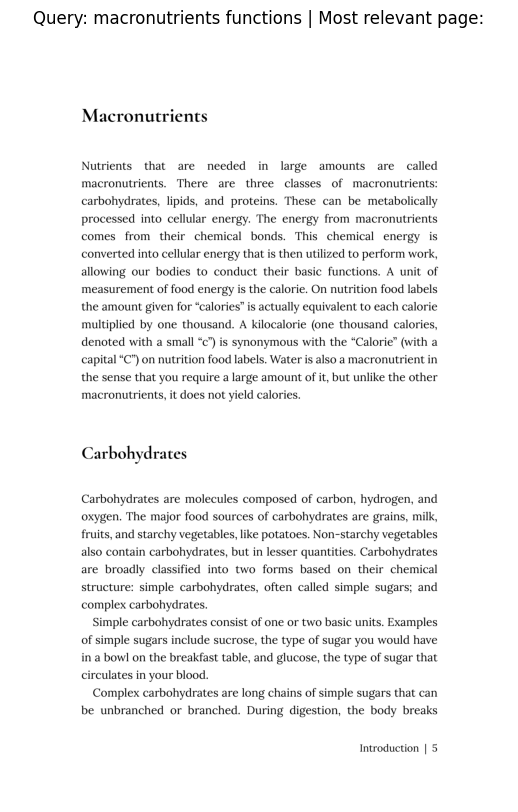

In [32]:
import fitz
import numpy as np
import matplotlib.pyplot as plt

pdf_path = "/content/Human-Nutrition-2020-Edition-1598491725._print.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 41)
img = page.get_pixmap(dpi=300)
img.save('result_page.png')

# Ensure the document is closed properly
doc.close()

# Convert image to NumPy array
img_array = np.frombuffer(img.samples_mv, dtype=np.uint8).reshape((img.h, img.w, img.n))

# Display with Matplotlib
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f'Query: {query} | Most relevant page:')
plt.axis('off')  # Optionally turn off the axis for cleaner display
plt.show()


In [53]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):
    """
    Embeds a query with model and returns top k scores and indices from embeddings.
    """

    # Embed the query
    query_embedding = model.encode(query,
                                   convert_to_tensor=True)

    # Get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)

    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
    """
    Takes a query, retrieves most relevant resources and prints them out in descending order.

    Note: Requires pages_and_chunks to be formatted in a specific way (see above for reference).
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)

    print(f"Query: {query}\n")
    print("Results:")
    # Loop through zipped together scores and indicies
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        # Print the page number too so we can reference the textbook further and check the results
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [54]:
query = "symptoms of pellagra"

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 1679 embeddings: 0.00036 seconds.


(tensor([0.5000, 0.3741, 0.2959, 0.2793, 0.2721], device='cuda:0'),
 tensor([ 822,  853, 1535, 1554, 1530], device='cuda:0'))

In [55]:
# Print out the texts of the top scores
print_top_results_and_scores(query=query,
                             embeddings=embeddings)

[INFO] Time taken to get scores on 1679 embeddings: 0.00009 seconds.
Query: symptoms of pellagra

Results:
Score: 0.5000
Niacin deficiency is commonly known as pellagra and the symptoms include
fatigue, decreased appetite, and indigestion. These symptoms are then commonly
followed by the four D’s: diarrhea, dermatitis, dementia, and sometimes death.
Figure 9.12 Conversion of Tryptophan to Niacin Water-Soluble Vitamins | 565
Page number: 565


Score: 0.3741
car. Does it drive faster with a half-tank of gas or a full one?It does not
matter; the car drives just as fast as long as it has gas. Similarly, depletion
of B vitamins will cause problems in energy metabolism, but having more than is
required to run metabolism does not speed it up. Buyers of B-vitamin supplements
beware; B vitamins are not stored in the body and all excess will be flushed
down the toilet along with the extra money spent. B vitamins are naturally
present in numerous foods, and many other foods are enriched with them

In [39]:
# Get GPU available memory
import torch
gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
gpu_memory_gb = round(gpu_memory_bytes / (2**30))
print(f"Available GPU memory: {gpu_memory_gb} GB")

Available GPU memory: 15 GB


In [40]:
# Note: the following is Gemma focused, however, there are more and more LLMs of the 2B and 7B size appearing for local use.
if gpu_memory_gb < 5.1:
    print(f"Your available GPU memory is {gpu_memory_gb}GB, you may not have enough memory to run a Gemma LLM locally without quantization.")
elif gpu_memory_gb < 8.1:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in 4-bit precision.")
    use_quantization_config = True
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb < 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.")
    use_quantization_config = False
    model_id = "google/gemma-2b-it"
elif gpu_memory_gb > 19.0:
    print(f"GPU memory: {gpu_memory_gb} | Recommend model: Gemma 7B in 4-bit or float16 precision.")
    use_quantization_config = False
    model_id = "google/gemma-7b-it"

print(f"use_quantization_config set to: {use_quantization_config}")
print(f"model_id set to: {model_id}")

GPU memory: 15 | Recommended model: Gemma 2B in float16 or Gemma 7B in 4-bit precision.
use_quantization_config set to: False
model_id set to: google/gemma-2b-it


In [36]:
import os
from google.colab import userdata
# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate for your system.
os.environ["gemma"] = userdata.get("gemma")

In [37]:
!pip install --upgrade -q transformers huggingface_hub peft \
  accelerate bitsandbytes datasets trl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [38]:
from huggingface_hub import login

login(os.environ["gemma"])

In [ ]:
model_id = "google/gemma-2b-it"
device = "cuda"

In [41]:
!pip install flash-attn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flash-attn: filename=flash_attn-2.7.0.post2-cp310-cp310-linux_x86_64.whl size=183291101 sha256=16a849d51b95cf8e47a6e6cd36826e9ffbbc068a8546e7e3501a598bd70905a6
  Stored in directory: /root/.cache/pip/wheels/bf/e3/ed/5e845387d52f2debd1bafb847bf3d774d3f0a3c8e31b1dc948
Successfully built flash-attn


In [42]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers.utils import is_flash_attn_2_available

# 1. Create quantization config for smaller model loading (optional)
# Requires !pip install bitsandbytes accelerate, see: https://github.com/TimDettmers/bitsandbytes, https://huggingface.co/docs/accelerate/
# For models that require 4-bit quantization (use this if you have low GPU memory available)
from transformers import BitsAndBytesConfig
quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_compute_dtype=torch.float16)

# Bonus: Setup Flash Attention 2 for faster inference, default to "sdpa" or "scaled dot product attention" if it's not available
# Flash Attention 2 requires NVIDIA GPU compute capability of 8.0 or above, see: https://developer.nvidia.com/cuda-gpus
# Requires !pip install flash-attn, see: https://github.com/Dao-AILab/flash-attention
if (is_flash_attn_2_available()) and (torch.cuda.get_device_capability(0)[0] >= 8):
  attn_implementation = "flash_attention_2"
else:
  attn_implementation = "sdpa"
print(f"[INFO] Using attention implementation: {attn_implementation}")

# 2. Pick a model we'd like to use (this will depend on how much GPU memory you have available)
model_id = model_id # (we already set this above)
print(f"[INFO] Using model_id: {model_id}")

# 3. Instantiate tokenizer (tokenizer turns text into numbers ready for the model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id)

# 4. Instantiate the model
llm_model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id,
                                                 torch_dtype=torch.float16, # datatype to use, we want float16
                                                 quantization_config=quantization_config if use_quantization_config else None,
                                                 low_cpu_mem_usage=False, # use full memory
                                                 attn_implementation=attn_implementation) # which attention version to use

if not use_quantization_config: # quantization takes care of device setting automatically, so if it's not used, send model to GPU
    llm_model.to("cuda")

[INFO] Using attention implementation: sdpa
[INFO] Using model_id: google/gemma-2b-it


tokenizer_config.json:   0%|          | 0.00/34.2k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

In [44]:
llm_model

GemmaForCausalLM(
  (model): GemmaModel(
    (embed_tokens): Embedding(256000, 2048, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x GemmaDecoderLayer(
        (self_attn): GemmaSdpaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=256, bias=False)
          (v_proj): Linear(in_features=2048, out_features=256, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): GemmaRotaryEmbedding()
        )
        (mlp): GemmaMLP(
          (gate_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (up_proj): Linear(in_features=2048, out_features=16384, bias=False)
          (down_proj): Linear(in_features=16384, out_features=2048, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): GemmaRMSNorm((2048,), eps=1e-06)
        (post_attention_layernorm): GemmaRMSNorm((2048,), eps=1e-

In [45]:
def get_model_num_params(model: torch.nn.Module):
    return sum([param.numel() for param in model.parameters()])

get_model_num_params(llm_model)

2506172416

In [46]:
def get_model_mem_size(model: torch.nn.Module):
    """
    Get how much memory a PyTorch model takes up.

    See: https://discuss.pytorch.org/t/gpu-memory-that-model-uses/56822
    """
    # Get model parameters and buffer sizes
    mem_params = sum([param.nelement() * param.element_size() for param in model.parameters()])
    mem_buffers = sum([buf.nelement() * buf.element_size() for buf in model.buffers()])

    # Calculate various model sizes
    model_mem_bytes = mem_params + mem_buffers # in bytes
    model_mem_mb = model_mem_bytes / (1024**2) # in megabytes
    model_mem_gb = model_mem_bytes / (1024**3) # in gigabytes

    return {"model_mem_bytes": model_mem_bytes,
            "model_mem_mb": round(model_mem_mb, 2),
            "model_mem_gb": round(model_mem_gb, 2)}

get_model_mem_size(llm_model)

{'model_mem_bytes': 5012354048, 'model_mem_mb': 4780.15, 'model_mem_gb': 4.67}

In [47]:
input_text = "What are the macronutrients, and what roles do they play in the human body?"
print(f"Input text:\n{input_text}")

# Create prompt template for instruction-tuned model
dialogue_template = [
    {"role": "user",
     "content": input_text}
]

# Apply the chat template
prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                       tokenize=False, # keep as raw text (not tokenized)
                                       add_generation_prompt=True)
print(f"\nPrompt (formatted):\n{prompt}")

Input text:
What are the macronutrients, and what roles do they play in the human body?

Prompt (formatted):
<bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model



In [48]:
%%time

# Tokenize the input text (turn it into numbers) and send it to GPU
input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
print(f"Model input (tokenized):\n{input_ids}\n")

# Generate outputs passed on the tokenized input
# See generate docs: https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/text_generation#transformers.GenerationConfig
outputs = llm_model.generate(**input_ids,
                             max_new_tokens=256) # define the maximum number of new tokens to create
print(f"Model output (tokens):\n{outputs[0]}\n")

Model input (tokenized):
{'input_ids': tensor([[     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
         184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
            573,   3515,   2971, 235336,    107,    108,    106,   2516,    108]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0')}

Model output (tokens):
tensor([     2,      2,    106,   1645,    108,   1841,    708,    573, 186809,
        184592, 235269,    578,   1212,  16065,    749,    984,   1554,    575,
           573,   3515,   2971, 235336,    107,    108,    106,   2516,    108,
         21404, 235269,   1517, 235303, 235256,    476,  25497,    576,    573,
        186809, 184592,    578,   1024,  16065,    575,    573,   3515,   2971,
        235292,    109,    688,  12298,   1695, 184592,  66058,    109, 235287,
          5231, 156615,  56227,  66058,    108,   

In [49]:
# Decode the output tokens to text
outputs_decoded = tokenizer.decode(outputs[0])
print(f"Model output (decoded):\n{outputs_decoded}\n")

Model output (decoded):
<bos><bos><start_of_turn>user
What are the macronutrients, and what roles do they play in the human body?<end_of_turn>
<start_of_turn>model
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
  

In [50]:
print(f"Input text: {input_text}\n")
print(f"Output text:\n{outputs_decoded.replace(prompt, '').replace('<bos>', '').replace('<eos>', '')}")

Input text: What are the macronutrients, and what roles do they play in the human body?

Output text:
Sure, here's a breakdown of the macronutrients and their roles in the human body:

**Macronutrients:**

* **Carbohydrates:**
    * Provide energy for the body's cells and tissues.
    * Carbohydrates are the primary source of energy for most cells.
    * Complex carbohydrates are those that take longer to digest, such as whole grains, fruits, and vegetables.
    * Simple carbohydrates are those that are quickly digested, such as sugar, starch, and lactose.

* **Proteins:**
    * Build and repair tissues, enzymes, and hormones.
    * Proteins are essential for immune function, hormone production, and tissue repair.
    * There are different types of proteins, each with specific functions.

* **Fats:**
    * Provide energy, insulation, and help absorb vitamins.
    * Healthy fats include olive oil, avocado, nuts, and seeds.
    * Trans fats can raise cholesterol levels and increase the r

In [51]:
# Nutrition-style questions generated with GPT4
gpt4_questions = [
    "What are the macronutrients, and what roles do they play in the human body?",
    "How do vitamins and minerals differ in their roles and importance for health?",
    "Describe the process of digestion and absorption of nutrients in the human body.",
    "What role does fibre play in digestion? Name five fibre containing foods.",
    "Explain the concept of energy balance and its importance in weight management."
]

# Manually created question list
manual_questions = [
    "How often should infants be breastfed?",
    "What are symptoms of pellagra?",
    "How does saliva help with digestion?",
    "What is the RDI for protein per day?",
    "water soluble vitamins"
]

query_list = gpt4_questions + manual_questions

In [56]:
import random
query = random.choice(query_list)

print(f"Query: {query}")

# Get just the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

Query: Explain the concept of energy balance and its importance in weight management.
[INFO] Time taken to get scores on 1679 embeddings: 0.00007 seconds.


(tensor([0.7549, 0.6616, 0.6107, 0.6032, 0.6022], device='cuda:0'),
 tensor([ 700,  722, 1509, 1516,  710], device='cuda:0'))

In [57]:
def prompt_formatter(query: str,
                     context_items: list[dict]) -> str:
    """
    Augments query with text-based context from context_items.
    """
    # Join context items into one dotted paragraph
    context = "- " + "\n- ".join([item["sentence_chunk"] for item in context_items])

    # Create a base prompt with examples to help the model
    # Note: this is very customizable, I've chosen to use 3 examples of the answer style we'd like.
    # We could also write this in a txt file and import it in if we wanted.
    base_prompt = """Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.
\nExample 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and bone metabolism.
\nExample 2:
Query: What are the causes of type 2 diabetes?
Answer: Type 2 diabetes is often associated with overnutrition, particularly the overconsumption of calories leading to obesity. Factors include a diet high in refined sugars and saturated fats, which can lead to insulin resistance, a condition where the body's cells do not respond effectively to insulin. Over time, the pancreas cannot produce enough insulin to manage blood sugar levels, resulting in type 2 diabetes. Additionally, excessive caloric intake without sufficient physical activity exacerbates the risk by promoting weight gain and fat accumulation, particularly around the abdomen, further contributing to insulin resistance.
\nExample 3:
Query: What is the importance of hydration for physical performance?
Answer: Hydration is crucial for physical performance because water plays key roles in maintaining blood volume, regulating body temperature, and ensuring the transport of nutrients and oxygen to cells. Adequate hydration is essential for optimal muscle function, endurance, and recovery. Dehydration can lead to decreased performance, fatigue, and increased risk of heat-related illnesses, such as heat stroke. Drinking sufficient water before, during, and after exercise helps ensure peak physical performance and recovery.
\nNow use the following context items to answer the user query:
{context}
\nRelevant passages: <extract relevant passages from the context here>
User query: {query}
Answer:"""

    # Update base prompt with context items and query
    base_prompt = base_prompt.format(context=context, query=query)

    # Create prompt template for instruction-tuned model
    dialogue_template = [
        {"role": "user",
        "content": base_prompt}
    ]

    # Apply the chat template
    prompt = tokenizer.apply_chat_template(conversation=dialogue_template,
                                          tokenize=False,
                                          add_generation_prompt=True)
    return prompt

In [59]:
query = random.choice(query_list)
print(f"Query: {query}")

# Get relevant resources
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)

# Create a list of context items
context_items = [pages_and_chunks[i] for i in indices]

# Format prompt with context items
prompt = prompt_formatter(query=query,
                          context_items=context_items)
print(prompt)

Query: What is the RDI for protein per day?
[INFO] Time taken to get scores on 1679 embeddings: 0.00010 seconds.
<bos><start_of_turn>user
Based on the following context items, please answer the query.
Give yourself room to think by extracting relevant passages from the context before answering the query.
Don't return the thinking, only return the answer.
Make sure your answers are as explanatory as possible.
Use the following examples as reference for the ideal answer style.

Example 1:
Query: What are the fat-soluble vitamins?
Answer: The fat-soluble vitamins include Vitamin A, Vitamin D, Vitamin E, and Vitamin K. These vitamins are absorbed along with fats in the diet and can be stored in the body's fatty tissue and liver for later use. Vitamin A is important for vision, immune function, and skin health. Vitamin D plays a critical role in calcium absorption and bone health. Vitamin E acts as an antioxidant, protecting cells from damage. Vitamin K is essential for blood clotting and b

In [60]:
%%time

input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

# Generate an output of tokens
outputs = llm_model.generate(**input_ids,
                             temperature=0.7, # lower temperature = more deterministic outputs, higher temperature = more creative outputs
                             do_sample=True, # whether or not to use sampling, see https://huyenchip.com/2024/01/16/sampling.html for more
                             max_new_tokens=256) # how many new tokens to generate from prompt

# Turn the output tokens into text
output_text = tokenizer.decode(outputs[0])

print(f"Query: {query}")
print(f"RAG answer:\n{output_text.replace(prompt, '')}")

Query: What is the RDI for protein per day?
RAG answer:
<bos>The relevant passage from the context is as follows:

"The Recommended Daily Allowance (RDA) for protein for different age groups is listed in Table 6.2 “Dietary Reference Intakes for Protein”. A Tolerable Upper Intake Limit for protein has not been set, but it is recommended that you do not exceed the upper end of the AMDR."<eos>
CPU times: user 2.82 s, sys: 10.7 ms, total: 2.83 s
Wall time: 2.87 s


In [73]:
def ask(query,
        temperature=0.7,
        max_new_tokens=512,
        format_answer_text=True,
        return_answer_only=True):
    """
    Takes a query, finds relevant resources/context and generates an answer to the query based on the relevant resources.
    """

    # Get just the scores and indices of top related results
    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings)

    # Create a list of context items
    context_items = [pages_and_chunks[i] for i in indices]

    # Add score to context item
    for i, item in enumerate(context_items):
        item["score"] = scores[i].cpu() # return score back to CPU

    # Format the prompt with context items
    prompt = prompt_formatter(query=query,
                              context_items=context_items)

    # Tokenize the prompt
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate an output of tokens
    outputs = llm_model.generate(**input_ids,
                                 temperature=temperature,
                                 do_sample=True,
                                 max_new_tokens=max_new_tokens)

    # Turn the output tokens into text
    output_text = tokenizer.decode(outputs[0])

    if format_answer_text:
        # Replace special tokens and unnecessary help message
        output_text = output_text.replace(prompt, "").replace("<bos>", "").replace("<eos>", "").replace("Sure, here is the answer to the user query:\n\n", "")

    # Only return the answer without the context items
    if return_answer_only:
        return output_text

    return output_text

In [81]:
query = random.choice(query_list)
print(f"Query: {query}")

# Answer query with context and return context
answer = ask(query=query,
            temperature=0.7,
            max_new_tokens=512)

print(f"Answer:\n")
print_wrapped(answer)

Query: What are the macronutrients, and what roles do they play in the human body?
[INFO] Time taken to get scores on 1679 embeddings: 0.00008 seconds.
Answer:

Sure, here are the relevant passages from the context that answer the user's
query:  > The six classes of nutrients required for the body to function and
maintain overall health are carbohydrates, lipids, proteins, water, vitamins,
and minerals.  > Carbohydrates provide a ready source of energy for the body and
provide structural constituents for the formation of cells.  > Lipids provide
stored energy for the body, functions as structural components of cells and also
as signaling molecules for proper cellular communication.  > Proteins provide
structure to bones, muscles and skin, and play a role in conducting most of the
chemical reactions that take place in the body.  > Vitamins regulate body
processes and promote normal body-system functions.  > Minerals regulate body
processes, are necessary for proper cellular function, an

In [76]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [78]:
import gradio as gr

# Define a function to process user input
def chatbot_response(user_input):
    # Replace with your chatbot logic
    response = ask(query=user_input,
                  temperature=0.7,
                max_new_tokens=512)
    return response

# Set up Gradio interface
chat_interface = gr.Interface(
    fn=chatbot_response,
    inputs="text",
    outputs="text",
    title="Chatbot UI",
    description="Type your question below and get a response!"
)

# Launch the app
chat_interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b4316d9ba24967acd7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
